In [16]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data_w_targets/demo_zip_11.csv').drop(columns='Unnamed: 0')
df

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date,avg_rent
0,26291,28,53,1987.0,0,0,18,12,0,0,...,0,0,134,38,49,0,19,28,20072011,957.272727
1,80927,34,215,2005.0,0,0,0,0,0,0,...,0,0,487,50,384,0,40,13,20072011,NaN
2,1253,84,195,1979.0,0,14,0,0,0,0,...,4,4,543,100,337,15,22,60,20072011,1742.555556
3,81130,128,230,1982.0,26,2,0,0,0,4,...,16,5,660,81,450,10,48,71,20072011,NaN
4,3592,197,448,1982.0,27,27,2,11,9,19,...,5,0,1153,63,814,10,76,171,20072011,931.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13157,34211,288,780,1999.0,14,13,0,0,0,0,...,34,0,2345,512,1485,11,127,199,20072011,1614.416667
13158,28646,97,173,1984.0,0,0,0,0,0,0,...,2,2,560,105,366,0,38,45,20072011,1001.363636
13159,95335,141,220,1971.0,56,20,0,0,0,0,...,5,2,703,45,308,0,0,346,20072011,1415.916667
13160,86017,50,251,1984.0,0,0,0,0,0,0,...,0,0,750,225,439,0,11,75,20072011,1364.000000


In [3]:
df.isna().sum().sort_values(ascending=False).head(20)

pop_25_years_over                                              13162
associates_degree                                              13162
bachelors_degree                                               13162
high_school_diploma                                            13162
less_one_year_college                                          13162
masters_degree                                                 13162
one_year_more_college                                          13162
avg_rent                                                        1225
aggregate_travel_time_to_work                                    981
median_rent                                                       45
renter_occupied_housing_units_paying_cash_median_gross_rent       44
percent_income_spent_on_rent                                      39
median_year_structure_built                                        9
owner_occupied_housing_units_median_value                          1
owner_occupied_housing_units_upper

In [4]:
df.isna().sum().sort_values(ascending=False).head(20).keys()

Index(['pop_25_years_over', 'associates_degree', 'bachelors_degree',
       'high_school_diploma', 'less_one_year_college', 'masters_degree',
       'one_year_more_college', 'avg_rent', 'aggregate_travel_time_to_work',
       'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'percent_income_spent_on_rent', 'median_year_structure_built',
       'owner_occupied_housing_units_median_value',
       'owner_occupied_housing_units_upper_value_quartile', 'gini_index',
       'income_per_capita',
       'owner_occupied_housing_units_lower_value_quartile',
       'commute_35_39_mins',
       'employed_arts_entertainment_recreation_accommodation_food'],
      dtype='object')

In [101]:
df2 = df.drop(columns=['pop_25_years_over', 'associates_degree', 'bachelors_degree',
       'high_school_diploma', 'less_one_year_college', 'masters_degree',
       'one_year_more_college', 'aggregate_travel_time_to_work',
       'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'percent_income_spent_on_rent', 'median_year_structure_built'
                      ]).dropna().reset_index().drop(columns='index')
df2 = df2[df2.avg_rent < 8000]

In [102]:
X = df2.drop(columns=['geo_id', 'do_date', 'avg_rent'])
#X= df2[['median_rent']]
y = df2.avg_rent

In [96]:
mlr = LinearRegression()
#mlr_train = []
mlr_lin = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    #mlr_train.append(mlr.score(X_train, y_train))
    mlr_lin.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

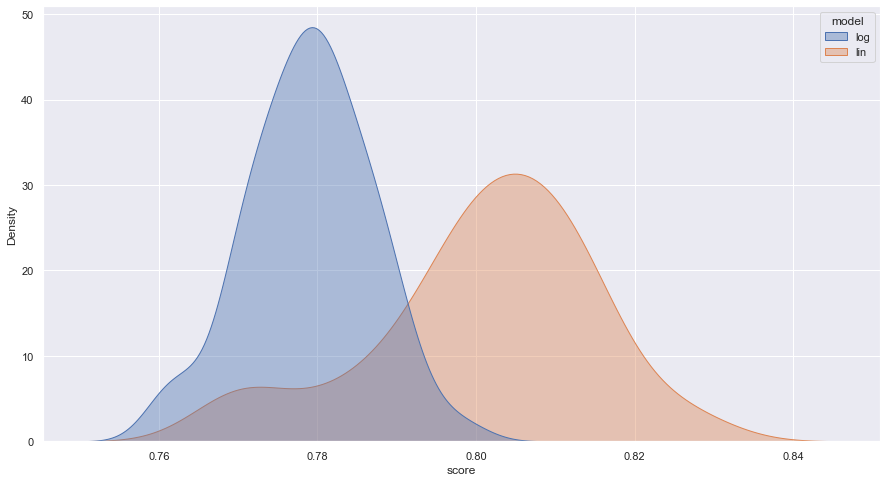

In [97]:
scores = pd.concat([pd.DataFrame({'score':mlr_log,'model':'log'})
                    ,pd.DataFrame({'score':mlr_lin,'model':'lin'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Setting max_iter because it doesn't coverge without it
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.05,0.55,41)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

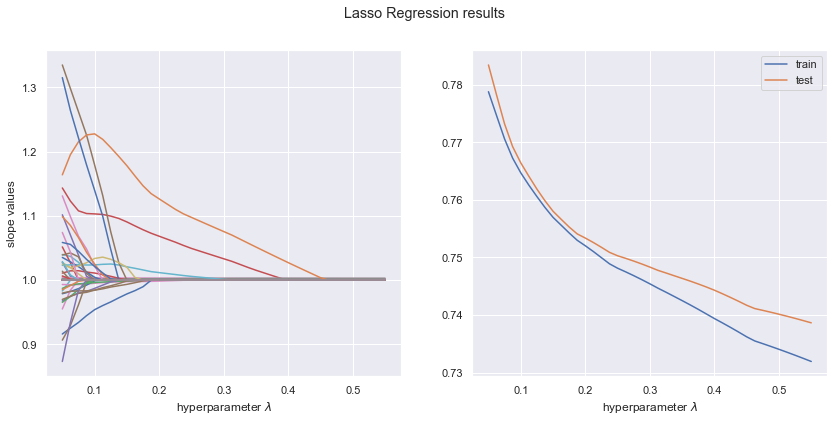

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [165]:
np.linspace(0.05,0.55,41)

array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   , 0.1125, 0.125 , 0.1375,
       0.15  , 0.1625, 0.175 , 0.1875, 0.2   , 0.2125, 0.225 , 0.2375,
       0.25  , 0.2625, 0.275 , 0.2875, 0.3   , 0.3125, 0.325 , 0.3375,
       0.35  , 0.3625, 0.375 , 0.3875, 0.4   , 0.4125, 0.425 , 0.4375,
       0.45  , 0.4625, 0.475 , 0.4875, 0.5   , 0.5125, 0.525 , 0.5375,
       0.55  ])

In [169]:
coefs_lasso

,nonfamily_households,family_households,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,female_female_households,four_more_cars,gini_index,gradu

In [170]:
coefs_lasso.loc[0.1,coefs_lasso.loc[0.1,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.089026
male_80_to_84                                        0.071564
male_male_households                                 0.056830
million_dollar_housing_units                         0.042593
asian_male_55_64                                     0.014411
employed_information                                 0.010750
dwellings_50_or_more_units                           0.010185
male_85_and_over                                     0.009450
walked_to_work                                       0.009140
dwellings_1_units_attached                           0.004792
mobile_homes                                         0.001980
owner_occupied_housing_units_lower_value_quartile    0.001551
commute_45_59_mins                                   0.001446
income_per_capita                                    0.001029
owner_occupied_housing_units_median_value            0.000878
owner_occupied_housing_units_upper_value_quartile    0.000084
amerindi

In [171]:
coefs_lasso.loc[0.2,coefs_lasso.loc[0.2,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.051690
million_dollar_housing_units                         0.028710
dwellings_50_or_more_units                           0.005085
owner_occupied_housing_units_lower_value_quartile    0.001376
owner_occupied_housing_units_median_value            0.001071
income_per_capita                                    0.000342
owner_occupied_housing_units_upper_value_quartile    0.000081
white_pop                                           -0.000609
Name: 0.2, dtype: float64

In [173]:
coefs_lasso.loc[0.3,coefs_lasso.loc[0.3,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.031656
million_dollar_housing_units                         0.014222
owner_occupied_housing_units_median_value            0.001241
owner_occupied_housing_units_lower_value_quartile    0.001229
dwellings_50_or_more_units                           0.000538
owner_occupied_housing_units_upper_value_quartile    0.000030
Name: 0.3, dtype: float64

In [172]:
coefs_lasso.loc[0.4,coefs_lasso.loc[0.4,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.011663
owner_occupied_housing_units_median_value            0.001303
owner_occupied_housing_units_lower_value_quartile    0.001158
Name: 0.4, dtype: float64

In [66]:
# Let's try running the model again with only the attributes that survived at alpha = 0.1
alpha_0pt1_attr = coefs_lasso.loc[0.1,coefs_lasso.loc[0.1,:] != 0].sort_values(ascending=False).keys()
alpha_0pt1_attr

Index(['hispanic_male_45_54', 'male_80_to_84', 'male_male_households',
       'million_dollar_housing_units', 'male_85_and_over', 'walked_to_work',
       'asian_male_55_64', 'employed_information',
       'dwellings_50_or_more_units', 'male_75_to_79',
       'dwellings_1_units_attached', 'commute_45_59_mins',
       'owner_occupied_housing_units_lower_value_quartile',
       'owner_occupied_housing_units_median_value', 'income_per_capita',
       'owner_occupied_housing_units_upper_value_quartile',
       'dwellings_20_to_49_units', 'white_pop', 'amerindian_pop',
       'dwellings_2_units', 'different_house_year_ago_same_city',
       'households_public_asst_or_food_stamps',
       'vacant_housing_units_for_rent'],
      dtype='object')

In [68]:
X_0pt1 = X[alpha_0pt1_attr]
X_0pt1

,hispanic_male_45_54,male_80_to_84,male_male_households,million_dollar_housing_units,male_85_and_over,walked_to_work,asian_male_55_64,employed_information,dwellings_50_or_more_units,male_75_to_79,dwellings_1_units_attached,commute_45_59_mins,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,income_per_capita,owner_occupied_housing_units_upper_value_quartile,dwellings_20_to_49_units,white_pop,amerindian_pop,dwellings_2_units,different_house_year_ago_same_city,households_public_asst_or_food_stamps,vacant_housing_units_for_rent
0,0,0,0,0,0,18,0,0,0,0,0,0,69100.0,138700.0,20743.0,227100.0,0,134,0,0,0.0,14,0
1,0,4,0,0,8,7,0,0,2,8,0,29,198200.0,314900.0,51602.0,425000.0,0,558,0,22,0.0,14,0
2,0,26,0,0,22,33,0,9,3,15,5,26,139800.0,193500.0,26035.0,254800.0,10,1212,3,20,0.0,86,10
3,18,30,0,14,14,26,0,0,0,87,0,0,75800.0,179700.0,20399.0,239300.0,0,2373,13,0,194.0,210,33
4,0,81,0,0,5,63,0,0,0,103,6,88,25500.0,38100.0,14566.0,68400.0,23,2845,0,44,145.0,324,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,15,56,6,43,20,29,0,42,0,75,38,133,274700.0,372100.0,38153.0,553100.0,0,2480,0,0,0.0,28,0
11932,1,25,0,44,0,8,0,0,0,29,34,7,162800.0,367900.0,55735.0,851600.0,0,656,0,77,0.0,0,32
11933,0,0,0,0,0,3,0,0,0,0,21,0,269100.0,327000.0,38667.0,385500.0,0,731,0,0,2.0,51,0
11934,0,0,0,0,0,0,0,0,0,40,0,58,190800.0,235100.0,19516.0,292100.0,0,986,0,32,0.0,0,0


In [69]:
mlr = LinearRegression()
mlr_0pt1 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_0pt1, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_0pt1.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

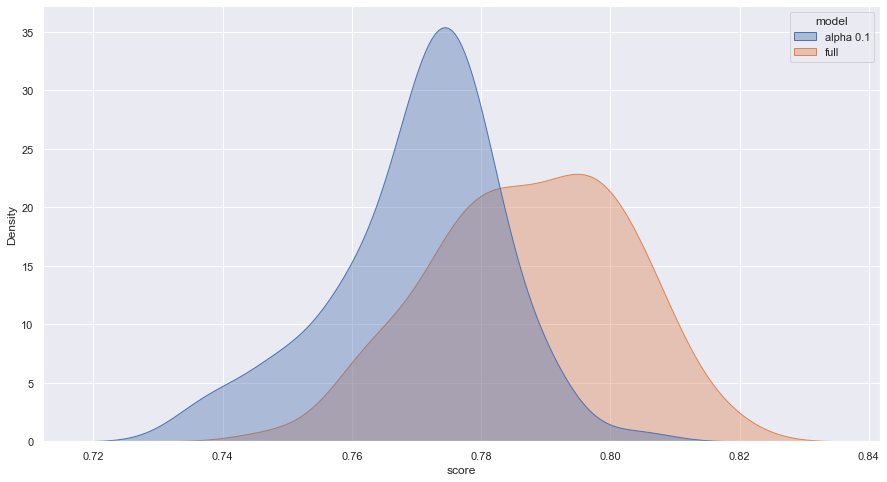

In [72]:
scores = pd.concat([pd.DataFrame({'score':mlr_0pt1,'model':'alpha 0.1'})
                    ,pd.DataFrame({'score':mlr_lin,'model':'full'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [105]:
# Now let's try running the model with alpha=0.1 100 times and averaging over the coefficients
lasso = Lasso(max_iter=10000, normalize=True, alpha=0.1)
coefs_lasso = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)  
coefs_lasso = pd.DataFrame(coefs_lasso, index = range(100), columns = X_train.columns)

In [114]:
attr = list(abs(coefs_lasso.mean(axis=0)).sort_values(ascending=False).keys())

In [174]:
attr

['hispanic_male_45_54',
 'male_male_households',
 'male_80_to_84',
 'million_dollar_housing_units',
 'vacant_housing_units_for_rent',
 'male_85_and_over',
 'walked_to_work',
 'asian_male_55_64',
 'dwellings_50_or_more_units',
 'households_public_asst_or_food_stamps',
 'different_house_year_ago_same_city',
 'employed_information',
 'dwellings_1_units_attached',
 'dwellings_2_units',
 'white_pop',
 'commute_45_59_mins',
 'male_45_64_less_than_9_grade',
 'owner_occupied_housing_units_lower_value_quartile',
 'amerindian_pop',
 'income_30000_34999',
 'owner_occupied_housing_units_median_value',
 'dwellings_20_to_49_units',
 'commute_40_44_mins',
 'male_75_to_79',
 'mobile_homes',
 'income_per_capita',
 'dwellings_1_units_detached',
 'commuters_by_subway_or_elevated',
 'housing_built_2005_or_later',
 'speak_spanish_at_home_low_english',
 'owner_occupied_housing_units_upper_value_quartile',
 'male_45_64_graduate_degree',
 'speak_spanish_at_home',
 'income_25000_29999',
 'median_income',
 'inc

In [183]:
coefs_lasso.mean(axis=0).sort_values(ascending=False)

hispanic_male_45_54                                               0.035476
million_dollar_housing_units                                      0.017972
male_80_to_84                                                     0.014546
male_male_households                                              0.012130
male_85_and_over                                                  0.003735
employed_information                                              0.003342
dwellings_50_or_more_units                                        0.003317
asian_male_55_64                                                  0.002580
walked_to_work                                                    0.002342
male_75_to_79                                                     0.002214
male_45_64_less_than_9_grade                                      0.001335
owner_occupied_housing_units_lower_value_quartile                 0.001288
commute_45_59_mins                                                0.001263
male_45_64_grade_9_12    

In [127]:
scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for a in attr: 
    if X_train.shape[1] > 1:
        X_train = X_train.drop(columns=a)
        X_test = X_test.drop(columns=a)
        mlr.fit(X_train, y_train)
        scores.append(mlr.score(X_test, y_test))

In [128]:
X_train.shape[1]

1

In [129]:
scores

[0.798461321612427,
 0.7984181603950525,
 0.7984155763067151,
 0.7968962073971564,
 0.7956952967262532,
 0.7958387306479009,
 0.7961300344226733,
 0.7960833187146665,
 0.7956142297541644,
 0.7949977007669213,
 0.7948139662628573,
 0.7948070137839433,
 0.7947861802396066,
 0.7943101677850694,
 0.7943242824136454,
 0.794324489729795,
 0.7943229781981573,
 0.7866360118311575,
 0.78689251849287,
 0.7868940608648602,
 0.7702536157200501,
 0.7713477073607535,
 0.7713449689345135,
 0.771423526322117,
 0.7703860438294109,
 0.7676574820445514,
 0.767646037816095,
 0.7676491998952223,
 0.7674982519962045,
 0.767317562513717,
 0.6986632038538652,
 0.6964407463958151,
 0.6962997944959934,
 0.6962628173211667,
 0.5682555836376966,
 0.5662078644303781,
 0.5646964200007317,
 0.5639525921491867,
 0.5640259730211836,
 0.5640487429736102,
 0.5626403062805123,
 0.5626172918973544,
 0.5626166128614103,
 0.5626115645670688,
 0.5625870397468199,
 0.5611718107325891,
 0.5611713042480848,
 0.5610291604417352,

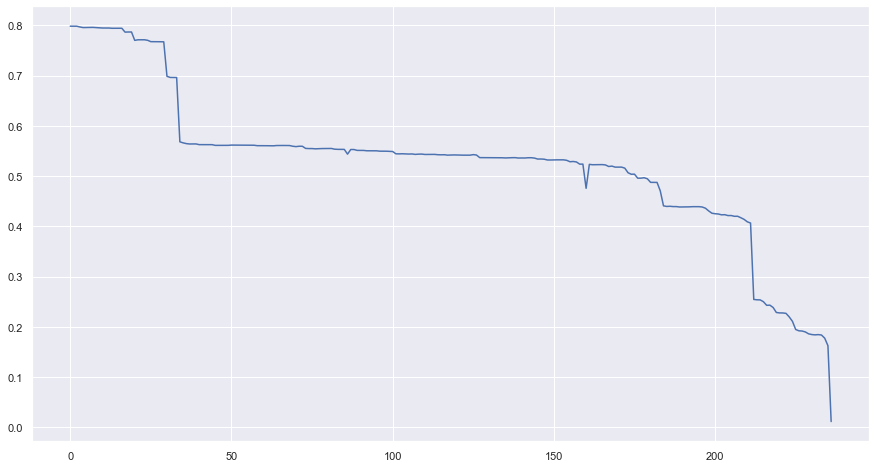

In [130]:
plt.plot(scores)
plt.show()

In [157]:
for i in range(10): 
    scores[i] = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train2 = pd.DataFrame()
    X_test2 = pd.DataFrame()
    for a in attr: 
        X_train2[a] = X_train[a]
        X_test2[a] = X_test[a]
        mlr.fit(X_train2, y_train)
        scores[i].append(mlr.score(X_test2, y_test))

In [158]:
scores_avg = []
for i in range(len(scores[1])):
    scores_avg.append()

238

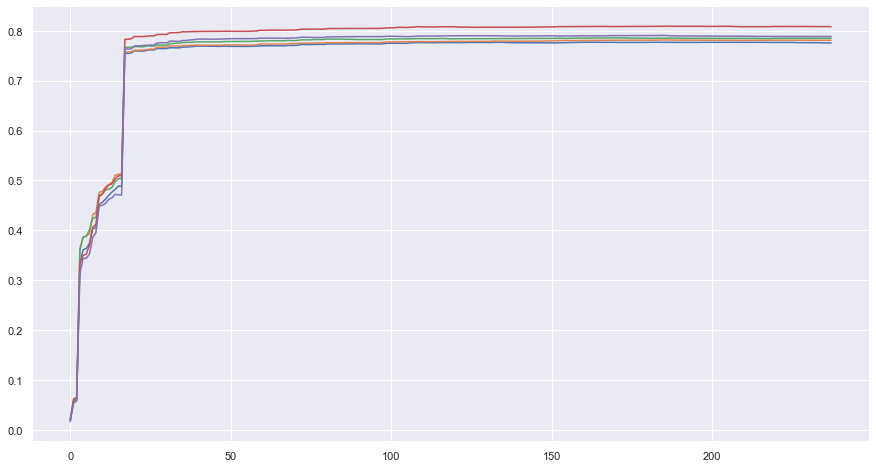

In [156]:
plt.plot(scores)
plt.plot(scores2)
plt.plot(scores3)
plt.plot(scores4)
plt.plot(scores5)
plt.show()

# Random Forest 🌳

In [32]:
model = ensemble.RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
%time model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

CPU times: user 1min 48s, sys: 286 ms, total: 1min 48s
Wall time: 1min 48s
The training r2: 0.97100
The test     r2: 0.80333


In [21]:
model = ensemble.RandomForestRegressor()
fst_base_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    fst_base_scores.append(model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
fst_data = pd.concat([#pd.DataFrame({'score':fst_scores,'model':'Tuned Parameters'}),
                  pd.DataFrame({'score':fst_base_scores,'model':'Default Parameters'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.6)
sns.kdeplot(data=fst_data, x="score", hue="model", fill=True, common_norm=False, alpha=0.4, linewidth=3)

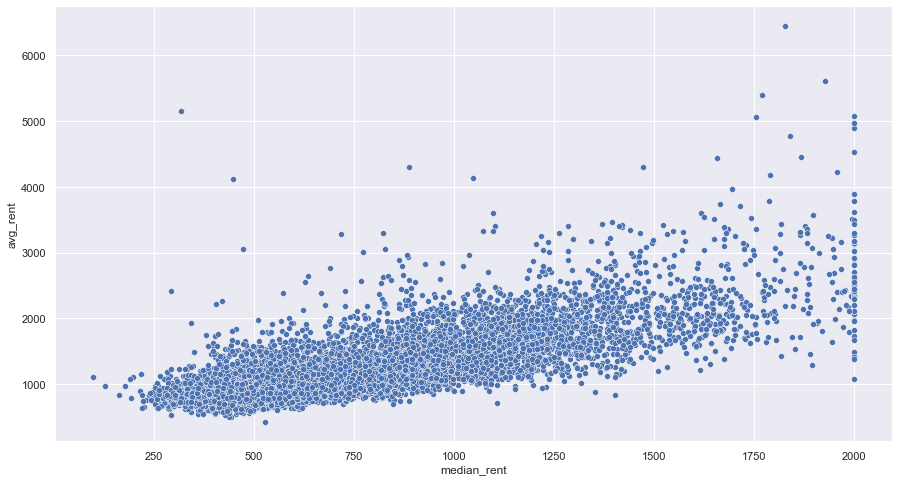

In [176]:
# So something weird is happening. Maybe we should look at the median_rent vs. avg_rent
sns.scatterplot(data=df[df.avg_rent<8000], x="median_rent", y="avg_rent")
#sns.scatterplot(data=df, x="median_rent", y="avg_rent")
#plt.ylim(0, 5000)
#plt.xlim(0, 2000)
plt.show()

In [161]:
# There are some really weird outliers here. Maybe we should look into these. 
df[df.avg_rent > 8000]

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e